<a href="https://colab.research.google.com/github/aliemadabdo/ML-Basics/blob/main/3_AlexNet_Covid19_binary_employ_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:

import keras 
from keras.models import * 
from keras.layers import * 
from keras.preprocessing import image
import PIL
from keras.callbacks import EarlyStopping

from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CovidDataset/Train/', target_size=(224, 224),
        batch_size=32,class_mode='binary',shuffle=False)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CovidDataset/Val/', target_size=(224, 224),
        batch_size=32,class_mode='binary',shuffle=False)


FileNotFoundError: ignored

In [ ]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
train_set.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_set.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/SavedModels/AlexNet_Covid19_binary.h5')


In [ ]:
model.evaluate(test_set)

2/2 [==============================] - 19s 11s/step - loss: 0.6572 - accuracy: 0.9500


[0.6571642756462097, 0.949999988079071]

In [ ]:
y_pred= ((model.predict(test_set)>=0.5).astype(int))

2/2 [==============================] - 3s 760ms/step


In [ ]:
y_pred.shape

(60, 1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(test_set.labels,y_pred))
print(accuracy_score(test_set.labels,y_pred)*100)


[[28  2]
 [ 1 29]]
95.0


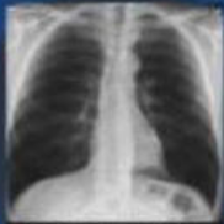

In [ ]:
import numpy as np
import keras.utils as image
img1 =image.load_img('/content/normal4.PNG',target_size =(224,224))
img1



In [ ]:
img =image.img_to_array(img1)
# img[0]


In [ ]:
img.shape

(224, 224, 3)

In [ ]:
img = img/255
# img

In [ ]:
# img=img.reshape(1,224, 224, 3)
# img.shape

In [ ]:
img =np.expand_dims(img, axis =0)
img.shape
# expand to take the first dim as batch size


(1, 224, 224, 3)

In [ ]:
y_pred_img = model.predict(img)
print(y_pred_img)


1/1 [==============================] - 0s 24ms/step
[[0.49484637]]


In [ ]:
y_pred_img1= ((y_pred_img>=0.5).astype(int))
y_pred_img1

array([[0]])

In [ ]:
if y_pred_img >= 0.5:
    prediction = 'normal'
else:
    prediction = 'covid'
print(prediction)

covid
